In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import *
from scipy.optimize import minimize
import numpy as np
from IPython.display import Image
from scipy.integrate import odeint, ode

### Solutions for the numerical problems in chapter 1 of Classical Mechanics by Dr. Morin.

#### problem on page 13

In [ ]:
# solve differential eqn at time=3

x=2
x1=0
t=3
eps_pow = 5
eps = 1*10**(-eps_pow)
print(eps)

for i in range(t*10**eps_pow):
    x2 = -5*x
    x = x + eps*x1
    x1 = x1 + eps*x2
    
print(x)

#### Problem 1.7

In [ ]:
#%%timeit

g = 9.8
r=1
r1=0
th=3.1415/18
th1=0
t=10
eps_pow = 6
eps = 10**(-eps_pow)
tol = 10**(-4)

for i in range(t*10**eps_pow):
    if 2-r >= tol:
        r2 = 0.5*(r*th1**2 - g*(1-np.cos(th)))
        th2 = -(1/r)*(2*r1*th1 + g*np.sin(th))
        r = r + eps*r1
        r1 = r1 + eps*r2
        th = th + eps*th1
        th1 = th1 + eps*th2
    else:
        break
    
print(r,f"time = {i/10**eps_pow}s")

#### Exercise 1.17

In [ ]:
g = 9.8
l = 1
th = np.pi/2
th1 = 0
t=10
eps_pow = 6
eps = 10**(-eps_pow)
tol = 10**(-4)

for i in range(t*10**eps_pow):
    if abs(th) > tol:
        th2 = -g*np.sin(th)/l
        th = th + eps*th1
        th1 = th1 + eps*th2
    else:
        break

print(th,f"time = {i/10**eps_pow}s")


#### Exercise 1.18

In [ ]:
# First part
A = 1
x1 = 2
x = 0

t=101
eps_pow = 4
eps = 10**(-eps_pow)
tol = 10**(-5)
t_keep = [1, 10,100,]

for i in range(t*10**eps_pow):
    if len(t_keep) > 0:
        tval = i/10**eps_pow
        x2 = -A*x1
        x = x + eps*x1
        x1 = x1 + eps*x2
        if abs(tval - t_keep[0]) < tol:
            print(x,f"time = {i/10**eps_pow}s")
            t_keep.pop(0)
            print(t_keep)

In [ ]:
# second part
# First part
x1 = 1
x = 0
t = 1001
t_keep = [1, 10,100,1000]
t_keep1 = t_keep.copy()
val = []

for i in range(t*10**eps_pow):
    if len(t_keep) > 0:
        tval = i/10**eps_pow
        x2 = -A*x1**2
        x = x + eps*x1
        x1 = x1 + eps*x2
        if abs(tval - t_keep[0]) < tol:
            val.append(x)
            print(x,f"time = {i/10**eps_pow}s")
            t_keep.pop(0)
            print(t_keep)
            
plt.figure()
plt.plot(t_keep1, val,'-o')
plt.plot(t_keep1, np.log(t_keep1),'x-')

#### 2.9 solve numeric part

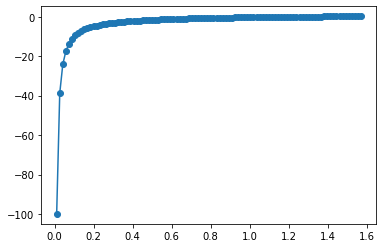

In [10]:
x = np.linspace(0.01,np.pi/2,100)
y = np.tanh(x) - 1/x
plt.figure()
plt.plot(x,y,'-o')

In [17]:
# simple search
for x in np.linspace(0.1,np.pi/2,1000):
    y = np.tanh(x)-1/x
    if y > 0:
        print(x, y)
        break

1.1997846407565442 0.00010599113358711332


In [22]:
# lambda function
z = lambda x: (np.tanh(x)-1/x)**2

In [25]:
# least squares solution
sol = minimize(z,1.5)
sol

      fun: 4.001565165873097e-12
 hess_inv: array([[1.01453423]])
      jac: array([4.01567018e-06])
  message: 'Optimization terminated successfully.'
     nfev: 12
      nit: 2
     njev: 4
   status: 0
  success: True
        x: array([1.19968064])

In [31]:
eta = sol.x
print(2*np.sinh(eta)/eta)
print((np.cosh(eta)-1)/(2*eta))

[2.51547475]
[0.3376622]
